In [365]:
# Import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np
from scipy.stats import linregress

In [366]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_metadata_path)
study = pd.read_csv(study_results_path)

In [367]:
# Combine the data into a single dataset
print(mouse.shape)
mouse.head()

# Display the data table for preview


(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [368]:
print(study.head())
print(study.shape)
study.sort_values(by=['Mouse ID'])
print(study['Mouse ID'].nunique())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
(1893, 4)
249


In [369]:
# Join tables
df = pd.merge(study, mouse, how="left", on="Mouse ID")
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [370]:
# Check number of unique mice
print(df['Mouse ID'].nunique())

249


In [371]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_study = df[df.duplicated(['Mouse ID', 'Timepoint'])]
dups_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [372]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[(df['Mouse ID'] == "g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [373]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[(df['Mouse ID'] != "g989")]
print(clean_df['Mouse ID'].nunique())
clean_df.head()

248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [374]:
tumor_means = clean_df.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].mean()
tumor_med = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].median()
tumor_var = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].var()
tumor_std = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].std()
tumor_sem = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].sem()

# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
stats = reduce(lambda left,right: pd.merge(left, right, on='Drug Regimen'), [tumor_means, tumor_med, tumor_var, tumor_std, tumor_sem])

stats.columns = ['Drug Regimen', 'Mean Tumor Vol (mm3)', 'Median Tumor Vol (mm3)', 'Variance Tumor Vol', 'Std Dev Tumor Vol',
                'SEM Tumor Vol']

stats

,Drug Regimen,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance Tumor Vol,Std Dev Tumor Vol,SEM Tumor Vol
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [375]:
# Produce same table as above using .agg method
stats1 = clean_df.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
stats1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


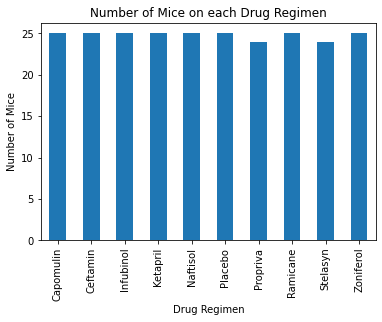

In [376]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniquemice = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique()
uniquemice.plot(kind='bar', title='Number of Mice on each Drug Regimen', ylabel='Number of Mice')

plt.show()

Text(0, 0.5, 'Number of Mice')

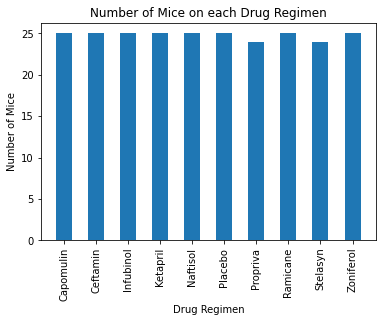

In [377]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
xaxis = np.arange(len(uniquemice))
plt.bar(xaxis, uniquemice, width=0.5)
ticks = [val for val in xaxis]
plt.xticks(ticks, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                  "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)
plt.title('Number of Mice on each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

<AxesSubplot:title={'center':'Sex Distribution of Mice Studied'}, ylabel='Sex'>

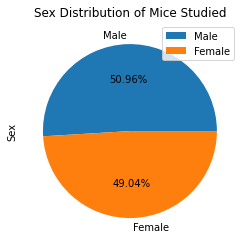

In [378]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distib = clean_df['Sex'].value_counts()
gender_distib.plot.pie(title='Sex Distribution of Mice Studied', legend = True, autopct="%1.2f%%")

Text(0, 0.5, 'Sex')

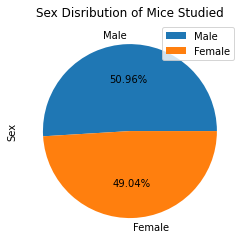

In [379]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distib, labels=['Male', 'Female'], autopct="%1.2f%%")
plt.legend()
plt.title('Sex Disribution of Mice Studied')
plt.ylabel('Sex')

In [380]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtimes = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_df = pd.merge(clean_df, maxtimes, how='left', on='Mouse ID')
clean_df = clean_df.rename(columns={"Timepoint_y" : "Last Timepoint"})
clean_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [381]:
drugnames = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumorvols = []
counter = 0

# loop through all drugs and make tumorovls a list of lists with volume info for each drug
# get IQR for specific drug as follows: st.iqr(tumorvols[0])
# https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
# Outliers are either less than Q1 - 1.5 * IQR or are greater than Q3 + 1.5 * IQR

for d in drugnames:
    tumorvols.append(clean_df.loc[clean_df["Drug Regimen"] == d, 'Tumor Volume (mm3)'])
    q1 = np.percentile(tumorvols[drugnames.index(d)], 25)
    q3 = np.percentile(tumorvols[drugnames.index(d)], 75)
    iqr = st.iqr(tumorvols[drugnames.index(d)])
    for point in tumorvols[drugnames.index(d)]:
        if point < (q1 - 1.5*iqr) or point > (q3 + 1.5*iqr):
            print(str(point) + " from drug regimen " + d + " could be an outlier!")





25.47214326 from drug regimen Capomulin could be an outlier!
23.34359787 from drug regimen Capomulin could be an outlier!
22.05012627 from drug regimen Ramicane could be an outlier!


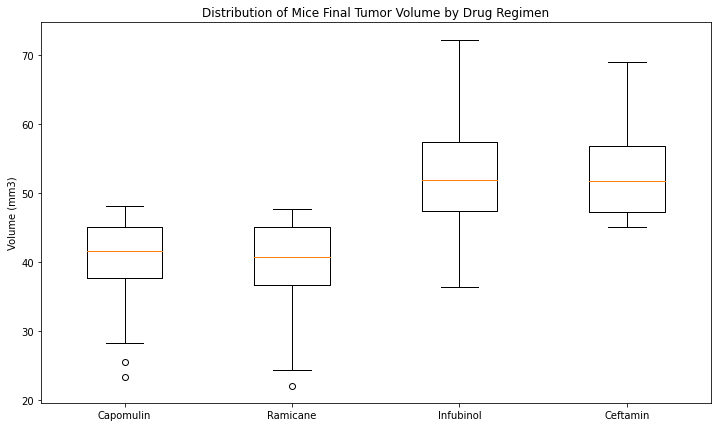

In [382]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.set_title('Distribution of Mice Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(tumorvols, labels=drugnames)
plt.show()

In [383]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Choose any mouse on it, or line plot for each, or do we use random choice????????????????????????????????????????????
chosenmouse = (clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin', 'Mouse ID'])
mouse = clean_df.loc[clean_df['Mouse ID'] == chosenmouse.tolist()[1]]
mouse

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
224,j246,0,45.000000,0,Capomulin,Female,21,21,35
447,j246,5,45.641438,0,Capomulin,Female,21,21,35
698,j246,10,46.408361,0,Capomulin,Female,21,21,35
785,j246,15,43.312654,0,Capomulin,Female,21,21,35
1011,j246,20,44.020370,0,Capomulin,Female,21,21,35
1265,j246,25,44.555226,0,Capomulin,Female,21,21,35
1343,j246,30,38.044082,1,Capomulin,Female,21,21,35
1485,j246,35,38.753265,1,Capomulin,Female,21,21,35


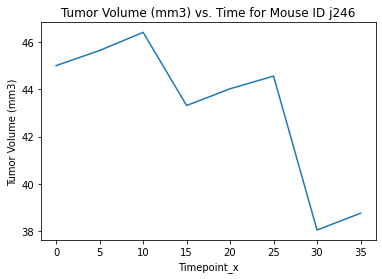

In [384]:
mouseplot = mouse.plot.line(x='Timepoint_x', y='Tumor Volume (mm3)', 
                            title='Tumor Volume (mm3) vs. Time for Mouse ID j246',
                            ylabel = 'Tumor Volume (mm3)', legend=False)


Line equation is y = 0.95x + 21.55


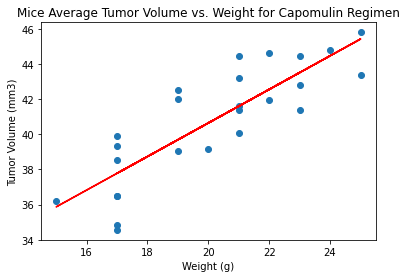

In [385]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Is this one mouse's average tumor volume vs. his weight at each point? Or the average tumor volume for a given weight????????

# Assuming First way
capomulin_mice = (clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin'])
miceavgs = capomulin_mice.groupby('Mouse ID', as_index=False)['Tumor Volume (mm3)'].mean()
cap_mice = pd.merge(miceavgs, capomulin_mice, on='Mouse ID')
cap_mice = ((cap_mice[['Mouse ID', 'Tumor Volume (mm3)_x', 'Weight (g)']]).drop_duplicates(keep='first'))

x_values= cap_mice['Weight (g)']
y_values = cap_mice['Tumor Volume (mm3)_x']

plt.scatter(x_values, y_values)
plt.title('Mice Average Tumor Volume vs. Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print("Line equation is " + line_eq)


plt.show()

In [386]:
# Correlation coefficient for above scatter plot & r-squared value for linear regression model
correlation = st.pearsonr(cap_mice['Weight (g)'], cap_mice['Tumor Volume (mm3)_x'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717
